# Pre-process Tweets for Online Travel Agencies

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

import re 
from string import punctuation
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

import joblib
import nbconvert
import pickle

from nltk.probability import FreqDist
import plotly
import plotly_express as px

import warnings
warnings.filterwarnings('ignore')

print('All Libraries Imported')

In [2]:
pd.set_option('display.max_colwidth', 2000)

## Import Tweets

In [3]:
df = pd.read_csv("ota_tweets.csv")
display(df.head())
display(df.info())
display(round(df.describe(),2))

,Created At,OTA,Text
0,2019-12-13 23:00:08,Expedia,#BREAKING\r\n\r\nMy Office has reached a settlement with @Orbitz &amp; @Expedia for failing keep PA’ns private info safe from hackers. A 2018 data breach exposed the data of thousands of PA’ns. \r\n\r\nAs part of the settlement -- Orbitz has agreed to strengthen their security practices.
1,2019-12-13 22:50:07,Expedia,#ad Find out what 10 destinations are hot with travelers in the @Expedia 2020 Travel Trends Report. #2020TravelTrends I'm always drawn to lighthouses and this view looks breathtaking! Where would you like to explore? https://t.co/kTKjv9iOVp https://t.co/2rUz7IfXb5
2,2019-12-13 22:44:59,Expedia,"@Expedia Just told my clients to book their flights, yes multiple, with @expedia obv they have it together... 🍵"
3,2019-12-13 22:42:22,Expedia,Goes to @Expedia and books SAME flights with no issues.... 💅 who’s the best? 👇👇👇 Expedia https://t.co/NRc6iTljEE
4,2019-12-13 22:37:58,Expedia,Mobile Exclusive Deals V2 | :15 | Expedia https://t.co/gU8aeFXOzj via @YouTube


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5355 entries, 0 to 5354
Data columns (total 3 columns):
Created At    5355 non-null object
OTA           5355 non-null object
Text          5355 non-null object
dtypes: object(3)
memory usage: 125.6+ KB


None

,Created At,OTA,Text
count,5355,5355,5355
unique,5081,4,4948
top,2019-12-05 14:14:34,Expedia,Luxury travel for cheap price✨\r\nIt's up to 60% off and cash back\r\nhttps://t.co/zJEpBgHs9R \r\n#Booking.com #priceline.com #Expedia #Marriot #Hilton
freq,3,2592,15


In [4]:
df.rename(columns={'Text':'Tweets'},inplace=True)

In [5]:
rows,cols = df.shape
print("Number of rows: ", rows)
print("Number of columns: ", cols)

Number of rows:  5355
Number of columns:  3


In [6]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Tweets,0,0.0
OTA,0,0.0
Created At,0,0.0


## Sentiment Analysis

Tweets will be analyzed to determine the emotional tone they carry. VADER will be used to sort the tweets into positive, neutral and negative sentiment. TextBlob will be used to grade the subjectivity of the tweets, determining if they are based on facts or opinions. 

In [7]:
#sentiment_score
df['Sentiment_VADER'] = df['Tweets'].map(lambda text: SentimentIntensityAnalyzer().polarity_scores(text)['compound'])

In [8]:
df['Sentiment_TextBlob'] = df['Tweets'].map(lambda text: TextBlob(text).sentiment.polarity)

In [9]:
#subejctivity
df['Subjectivity'] = df['Tweets'].map(lambda text: TextBlob(text).sentiment.subjectivity)

In [10]:
df.head(20)

,Created At,OTA,Tweets,Sentiment_VADER,Sentiment_TextBlob,Subjectivity
0,2019-12-13 23:00:08,Expedia,#BREAKING\r\n\r\nMy Office has reached a settlement with @Orbitz &amp; @Expedia for failing keep PA’ns private info safe from hackers. A 2018 data breach exposed the data of thousands of PA’ns. \r\n\r\nAs part of the settlement -- Orbitz has agreed to strengthen their security practices.,0.6705,0.250000,0.437500
1,2019-12-13 22:50:07,Expedia,#ad Find out what 10 destinations are hot with travelers in the @Expedia 2020 Travel Trends Report. #2020TravelTrends I'm always drawn to lighthouses and this view looks breathtaking! Where would you like to explore? https://t.co/kTKjv9iOVp https://t.co/2rUz7IfXb5,0.6996,0.625000,0.925000
2,2019-12-13 22:44:59,Expedia,"@Expedia Just told my clients to book their flights, yes multiple, with @expedia obv they have it together... 🍵",0.4019,0.000000,0.000000
3,2019-12-13 22:42:22,Expedia,Goes to @Expedia and books SAME flights with no issues.... 💅 who’s the best? 👇👇👇 Expedia https://t.co/NRc6iTljEE,0.4588,0.500000,0.212500
4,2019-12-13 22:37:58,Expedia,Mobile Exclusive Deals V2 | :15 | Expedia https://t.co/gU8aeFXOzj via @YouTube,0.1280,0.000000,0.000000
5,2019-12-13 22:30:14,Expedia,#AD I'm thinking sandy #beaches &amp; warm blue waters. Maybe far flung beaches worthy of a #bucketlist #vacation! The @Expedia (one of the world’s largest online travel brands) 2020 #Travel Trends Report has lots on exotic beach getaways! https://t.co/dRXQujajdm #2020TravelTrends https://t.co/CHdSiAO2NJ,0.6580,0.348333,0.740000
6,2019-12-13 22:26:41,Expedia,"The settlement follows an investigation into a data breach in 2018 involving Orbitz and its parent company, Expedia. https://t.co/IXOQZJ0Qfm",0.0000,0.000000,0.000000
7,2019-12-13 22:24:00,Expedia,"@VrboPolicy @OxfordEconomics @PhilipJMinardi @ExpediaGroup @WSJ A study paid for by STR booking giant #Expedia. C'mon man,",0.0000,0.000000,1.000000
8,2019-12-13 22:20:43,Expedia,"#ad .@Expedia can help you find fun activities that will make your next trip truly memorable, Be sure to add them to your itinerary. Click the link to the Expedia 2020 Travel Trends Report! Be sure to Share and Comment: https://t.co/Yqrth2XBMX #2020TravelTrends https://t.co/Xmmzs0o7fr",0.9324,0.385000,0.595556
9,2019-12-13 22:08:59,Expedia,12 of the trendiest international destinations you should really visit in 2020 https://t.co/A9aY81sV4A via @usatoday @Expedia @vrbo,0.0000,0.100000,0.100000


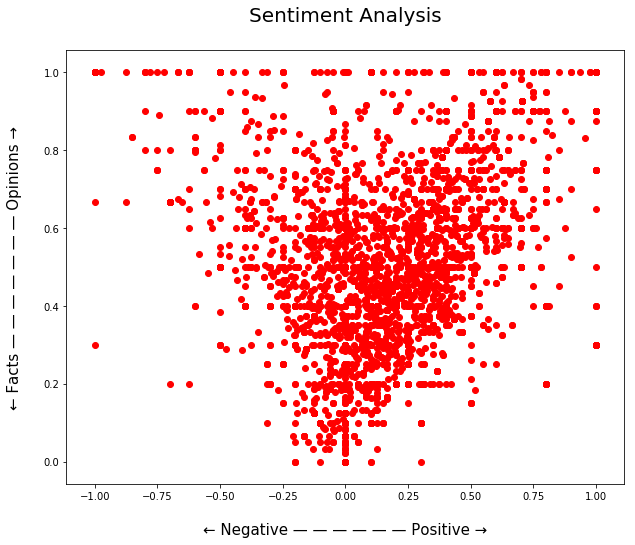

In [11]:
#plot subjectivity vs. polarity
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
for index, Tweets in enumerate(df.index):
    x = df['Sentiment_TextBlob'].loc[Tweets]
    y = df['Subjectivity'].loc[Tweets]
    plt.scatter(x, y, color='Red')

plt.title('Sentiment Analysis\n', fontsize = 20)
plt.xlabel('\n← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →\n', fontsize=15)
plt.show()

In [12]:
positive_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if df['Sentiment_VADER'][index] >= 0.05]
neutral_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if df['Sentiment_VADER'][index] == 0]
negative_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if df['Sentiment_VADER'][index] <= -0.05]

In [13]:
print('Percentage Positive Tweets: {}%'.format(len(positive_tweets)*100/len(df['Tweets'])))
print('Percentage Neutral Tweets: {}%'.format(len(neutral_tweets)*100/len(df['Tweets'])))
print('Percentage Negative Tweets: {}%'.format(len(negative_tweets)*100/len(df['Tweets'])))

Percentage Positive Tweets: 55.182072829131656%
Percentage Neutral Tweets: 24.817927170868348%
Percentage Negative Tweets: 19.140989729225023%


In [14]:
df['Sentiment'] = df['Sentiment_VADER'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')
df['Sentiment'] = df['Sentiment'].map({'Positive':1, 'Negative':0})

In [15]:
df.head()

,Created At,OTA,Tweets,Sentiment_VADER,Sentiment_TextBlob,Subjectivity,Sentiment
0,2019-12-13 23:00:08,Expedia,#BREAKING\r\n\r\nMy Office has reached a settlement with @Orbitz &amp; @Expedia for failing keep PA’ns private info safe from hackers. A 2018 data breach exposed the data of thousands of PA’ns. \r\n\r\nAs part of the settlement -- Orbitz has agreed to strengthen their security practices.,0.6705,0.250,0.4375,1
1,2019-12-13 22:50:07,Expedia,#ad Find out what 10 destinations are hot with travelers in the @Expedia 2020 Travel Trends Report. #2020TravelTrends I'm always drawn to lighthouses and this view looks breathtaking! Where would you like to explore? https://t.co/kTKjv9iOVp https://t.co/2rUz7IfXb5,0.6996,0.625,0.9250,1
2,2019-12-13 22:44:59,Expedia,"@Expedia Just told my clients to book their flights, yes multiple, with @expedia obv they have it together... 🍵",0.4019,0.000,0.0000,1
3,2019-12-13 22:42:22,Expedia,Goes to @Expedia and books SAME flights with no issues.... 💅 who’s the best? 👇👇👇 Expedia https://t.co/NRc6iTljEE,0.4588,0.500,0.2125,1
4,2019-12-13 22:37:58,Expedia,Mobile Exclusive Deals V2 | :15 | Expedia https://t.co/gU8aeFXOzj via @YouTube,0.1280,0.000,0.0000,1


## Natural Language Processing

### Define List of Stopwords

In [16]:
stop_words = stopwords.words("english") 
stop_words += list(punctuation) 
stop_words += ["/n","''", '""', '...', '``',"'",'’','amp','&', '-','/','and','a', 'or', 'in','for',"n't"]
stop_words += ['stregis','jwmarriott','ritzcarlton','whotels', 'westin','sheraton','marriott','renaissancehotels',
               'residenceinn','fairfieldinn','springhillsuites','courtyardbymarriott','jw','hotel','ritz','carlton',
               '_zalokar','_fairfieldinn','priceline','expedia','booking.com','com']

### Process Tweets

1. Remove links, special characters, hashtags, user IDs and numbers
2. Make all text lower case
3. Create tokens 
4. Lemmatize tokens
5. Transform lemmatized tokens into a string for vectorization

### Clean and Tokenize Tweets

In [17]:
def clean_tweets(tweet):
    ''' 
    Utility function to clean tweet text by removing links, special characters 
    using simple regex statements. 
    '''
    tweet = re.sub(r'^RT[\s]+', '', tweet) #retweets removed
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet) #links removed
    tweet = re.sub(r'#', '', tweet) #hashtag removed
    tweet = re.sub(r'@[A-Za-z0–9]+', '', tweet) #user ID removed
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)# numbers removed
    tweet = tweet.lower()
    tokens = nltk.word_tokenize(tweet)
    no_stopwords = [token for token in tokens if token not in stop_words]
    return no_stopwords

In [20]:
#clean_tweets()
df['cleaned_tweets'] = df['Tweets'].apply(clean_tweets)

In [21]:
df.head()

,Created At,OTA,Tweets,Sentiment_VADER,Sentiment_TextBlob,Subjectivity,Sentiment,cleaned_tweets
0,2019-12-13 23:00:08,Expedia,#BREAKING\r\n\r\nMy Office has reached a settlement with @Orbitz &amp; @Expedia for failing keep PA’ns private info safe from hackers. A 2018 data breach exposed the data of thousands of PA’ns. \r\n\r\nAs part of the settlement -- Orbitz has agreed to strengthen their security practices.,0.6705,0.250,0.4375,1,"[breaking, office, reached, settlement, failing, keep, pa, ns, private, info, safe, hackers, data, breach, exposed, data, thousands, pa, ns, part, settlement, orbitz, agreed, strengthen, security, practices]"
1,2019-12-13 22:50:07,Expedia,#ad Find out what 10 destinations are hot with travelers in the @Expedia 2020 Travel Trends Report. #2020TravelTrends I'm always drawn to lighthouses and this view looks breathtaking! Where would you like to explore? https://t.co/kTKjv9iOVp https://t.co/2rUz7IfXb5,0.6996,0.625,0.9250,1,"[ad, find, destinations, hot, travelers, travel, trends, report, traveltrends, always, drawn, lighthouses, view, looks, breathtaking, would, like, explore]"
2,2019-12-13 22:44:59,Expedia,"@Expedia Just told my clients to book their flights, yes multiple, with @expedia obv they have it together... 🍵",0.4019,0.000,0.0000,1,"[told, clients, book, flights, yes, multiple, obv, together]"
3,2019-12-13 22:42:22,Expedia,Goes to @Expedia and books SAME flights with no issues.... 💅 who’s the best? 👇👇👇 Expedia https://t.co/NRc6iTljEE,0.4588,0.500,0.2125,1,"[goes, books, flights, issues, best]"
4,2019-12-13 22:37:58,Expedia,Mobile Exclusive Deals V2 | :15 | Expedia https://t.co/gU8aeFXOzj via @YouTube,0.1280,0.000,0.0000,1,"[mobile, exclusive, deals, v]"


### Lemmatize Tweets

In [22]:
#initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [23]:
#function to lemmatize text
def lemmatize_text(text):
    '''Function to turn list of tokens into a string for modeling
    '''
    lemmatized = []
    for word in text:
        lemmatized.append(lemmatizer.lemmatize(word))
    return lemmatized

In [24]:
#lemmatized tweets
df['Lemmatized'] = df['cleaned_tweets'].apply(lemmatize_text)

In [25]:
df.head(20)

,Created At,OTA,Tweets,Sentiment_VADER,Sentiment_TextBlob,Subjectivity,Sentiment,cleaned_tweets,Lemmatized
0,2019-12-13 23:00:08,Expedia,#BREAKING\r\n\r\nMy Office has reached a settlement with @Orbitz &amp; @Expedia for failing keep PA’ns private info safe from hackers. A 2018 data breach exposed the data of thousands of PA’ns. \r\n\r\nAs part of the settlement -- Orbitz has agreed to strengthen their security practices.,0.6705,0.250000,0.437500,1,"[breaking, office, reached, settlement, failing, keep, pa, ns, private, info, safe, hackers, data, breach, exposed, data, thousands, pa, ns, part, settlement, orbitz, agreed, strengthen, security, practices]","[breaking, office, reached, settlement, failing, keep, pa, n, private, info, safe, hacker, data, breach, exposed, data, thousand, pa, n, part, settlement, orbitz, agreed, strengthen, security, practice]"
1,2019-12-13 22:50:07,Expedia,#ad Find out what 10 destinations are hot with travelers in the @Expedia 2020 Travel Trends Report. #2020TravelTrends I'm always drawn to lighthouses and this view looks breathtaking! Where would you like to explore? https://t.co/kTKjv9iOVp https://t.co/2rUz7IfXb5,0.6996,0.625000,0.925000,1,"[ad, find, destinations, hot, travelers, travel, trends, report, traveltrends, always, drawn, lighthouses, view, looks, breathtaking, would, like, explore]","[ad, find, destination, hot, traveler, travel, trend, report, traveltrends, always, drawn, lighthouse, view, look, breathtaking, would, like, explore]"
2,2019-12-13 22:44:59,Expedia,"@Expedia Just told my clients to book their flights, yes multiple, with @expedia obv they have it together... 🍵",0.4019,0.000000,0.000000,1,"[told, clients, book, flights, yes, multiple, obv, together]","[told, client, book, flight, yes, multiple, obv, together]"
3,2019-12-13 22:42:22,Expedia,Goes to @Expedia and books SAME flights with no issues.... 💅 who’s the best? 👇👇👇 Expedia https://t.co/NRc6iTljEE,0.4588,0.500000,0.212500,1,"[goes, books, flights, issues, best]","[go, book, flight, issue, best]"
4,2019-12-13 22:37:58,Expedia,Mobile Exclusive Deals V2 | :15 | Expedia https://t.co/gU8aeFXOzj via @YouTube,0.1280,0.000000,0.000000,1,"[mobile, exclusive, deals, v]","[mobile, exclusive, deal, v]"
5,2019-12-13 22:30:14,Expedia,#AD I'm thinking sandy #beaches &amp; warm blue waters. Maybe far flung beaches worthy of a #bucketlist #vacation! The @Expedia (one of the world’s largest online travel brands) 2020 #Travel Trends Report has lots on exotic beach getaways! https://t.co/dRXQujajdm #2020TravelTrends https://t.co/CHdSiAO2NJ,0.6580,0.348333,0.740000,1,"[ad, thinking, sandy, beaches, warm, blue, waters, maybe, far, flung, beaches, worthy, bucketlist, vacation, one, world, largest, online, travel, brands, travel, trends, report, lots, exotic, beach, getaways]","[ad, thinking, sandy, beach, warm, blue, water, maybe, far, flung, beach, worthy, bucketlist, vacation, one, world, largest, online, travel, brand, travel, trend, report, lot, exotic, beach, getaway]"
6,2019-12-13 22:26:41,Expedia,"The settlement follows an investigation into a data breach in 2018 involving Orbitz and its parent company, Expedia. https://t.co/IXOQZJ0Qfm",0.0000,0.000000,0.000000,1,"[settlement, follows, investigation, data, breach, involving, orbitz, parent, company]","[settlement, follows, investigation, data, breach, involving, orbitz, parent, company]"
7,2019-12-13 22:24:00,Expedia,"@VrboPolicy @OxfordEconomics @PhilipJMinardi @ExpediaGroup @WSJ A study paid for by STR booking giant #Expedia. C'mon man,",0.0000,0.000000,1.000000,1,"[study, paid, str, booking, giant, c, mon, man]","[study, paid, str, booking, giant, c, mon, man]"
8,2019-12-13 22:20:43,Expedia,"#ad .@Expedia can help you find fun activities that will make your next trip truly memorable, Be sure to add them to your itinerary. Click the link to the Expedia 2020 Travel Trends Report! Be sure to Share and Comment: https://t.co/Yqrth2XBMX #2020TravelTrends https://t.co/Xmmzs0o7fr",0.9324,0

### Transform Lemmatized Tokens to Strings

In [26]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

In [27]:
df['Tweet_Strings'] = df['Lemmatized'].apply(listToString)

In [30]:
df.head()

,Created At,OTA,Tweets,Sentiment_VADER,Sentiment_TextBlob,Subjectivity,Sentiment,cleaned_tweets,Lemmatized,Tweet_Strings
0,2019-12-13 23:00:08,Expedia,#BREAKING\r\n\r\nMy Office has reached a settlement with @Orbitz &amp; @Expedia for failing keep PA’ns private info safe from hackers. A 2018 data breach exposed the data of thousands of PA’ns. \r\n\r\nAs part of the settlement -- Orbitz has agreed to strengthen their security practices.,0.6705,0.250,0.4375,1,"[breaking, office, reached, settlement, failing, keep, pa, ns, private, info, safe, hackers, data, breach, exposed, data, thousands, pa, ns, part, settlement, orbitz, agreed, strengthen, security, practices]","[breaking, office, reached, settlement, failing, keep, pa, n, private, info, safe, hacker, data, breach, exposed, data, thousand, pa, n, part, settlement, orbitz, agreed, strengthen, security, practice]",breaking office reached settlement failing keep pa n private info safe hacker data breach exposed data thousand pa n part settlement orbitz agreed strengthen security practice
1,2019-12-13 22:50:07,Expedia,#ad Find out what 10 destinations are hot with travelers in the @Expedia 2020 Travel Trends Report. #2020TravelTrends I'm always drawn to lighthouses and this view looks breathtaking! Where would you like to explore? https://t.co/kTKjv9iOVp https://t.co/2rUz7IfXb5,0.6996,0.625,0.9250,1,"[ad, find, destinations, hot, travelers, travel, trends, report, traveltrends, always, drawn, lighthouses, view, looks, breathtaking, would, like, explore]","[ad, find, destination, hot, traveler, travel, trend, report, traveltrends, always, drawn, lighthouse, view, look, breathtaking, would, like, explore]",ad find destination hot traveler travel trend report traveltrends always drawn lighthouse view look breathtaking would like explore
2,2019-12-13 22:44:59,Expedia,"@Expedia Just told my clients to book their flights, yes multiple, with @expedia obv they have it together... 🍵",0.4019,0.000,0.0000,1,"[told, clients, book, flights, yes, multiple, obv, together]","[told, client, book, flight, yes, multiple, obv, together]",told client book flight yes multiple obv together
3,2019-12-13 22:42:22,Expedia,Goes to @Expedia and books SAME flights with no issues.... 💅 who’s the best? 👇👇👇 Expedia https://t.co/NRc6iTljEE,0.4588,0.500,0.2125,1,"[goes, books, flights, issues, best]","[go, book, flight, issue, best]",go book flight issue best
4,2019-12-13 22:37:58,Expedia,Mobile Exclusive Deals V2 | :15 | Expedia https://t.co/gU8aeFXOzj via @YouTube,0.1280,0.000,0.0000,1,"[mobile, exclusive, deals, v]","[mobile, exclusive, deal, v]",mobile exclusive deal v


## Create Online Travel Agency Classes

The tweets will be split into three classes (Expedia, Priceline, Booking.com).

### Expedia

Expedia.com is an online travel agency and metasearch engine. The website and mobile app can be used to book airline tickets, hotel reservations, car rentals, cruise ships, and vacation packages.

In [31]:
expedia = pd.DataFrame(df.loc[df['OTA']=='Expedia'])
expedia.head()

,Created At,OTA,Tweets,Sentiment_VADER,Sentiment_TextBlob,Subjectivity,Sentiment,cleaned_tweets,Lemmatized,Tweet_Strings
0,2019-12-13 23:00:08,Expedia,#BREAKING\r\n\r\nMy Office has reached a settlement with @Orbitz &amp; @Expedia for failing keep PA’ns private info safe from hackers. A 2018 data breach exposed the data of thousands of PA’ns. \r\n\r\nAs part of the settlement -- Orbitz has agreed to strengthen their security practices.,0.6705,0.250,0.4375,1,"[breaking, office, reached, settlement, failing, keep, pa, ns, private, info, safe, hackers, data, breach, exposed, data, thousands, pa, ns, part, settlement, orbitz, agreed, strengthen, security, practices]","[breaking, office, reached, settlement, failing, keep, pa, n, private, info, safe, hacker, data, breach, exposed, data, thousand, pa, n, part, settlement, orbitz, agreed, strengthen, security, practice]",breaking office reached settlement failing keep pa n private info safe hacker data breach exposed data thousand pa n part settlement orbitz agreed strengthen security practice
1,2019-12-13 22:50:07,Expedia,#ad Find out what 10 destinations are hot with travelers in the @Expedia 2020 Travel Trends Report. #2020TravelTrends I'm always drawn to lighthouses and this view looks breathtaking! Where would you like to explore? https://t.co/kTKjv9iOVp https://t.co/2rUz7IfXb5,0.6996,0.625,0.9250,1,"[ad, find, destinations, hot, travelers, travel, trends, report, traveltrends, always, drawn, lighthouses, view, looks, breathtaking, would, like, explore]","[ad, find, destination, hot, traveler, travel, trend, report, traveltrends, always, drawn, lighthouse, view, look, breathtaking, would, like, explore]",ad find destination hot traveler travel trend report traveltrends always drawn lighthouse view look breathtaking would like explore
2,2019-12-13 22:44:59,Expedia,"@Expedia Just told my clients to book their flights, yes multiple, with @expedia obv they have it together... 🍵",0.4019,0.000,0.0000,1,"[told, clients, book, flights, yes, multiple, obv, together]","[told, client, book, flight, yes, multiple, obv, together]",told client book flight yes multiple obv together
3,2019-12-13 22:42:22,Expedia,Goes to @Expedia and books SAME flights with no issues.... 💅 who’s the best? 👇👇👇 Expedia https://t.co/NRc6iTljEE,0.4588,0.500,0.2125,1,"[goes, books, flights, issues, best]","[go, book, flight, issue, best]",go book flight issue best
4,2019-12-13 22:37:58,Expedia,Mobile Exclusive Deals V2 | :15 | Expedia https://t.co/gU8aeFXOzj via @YouTube,0.1280,0.000,0.0000,1,"[mobile, exclusive, deals, v]","[mobile, exclusive, deal, v]",mobile exclusive deal v


### Priceline

Priceline.com is an online travel agency for finding discount rates for travel-related purchases such as airline tickets and hotel stays. The company facilitates the provision of travel services from its suppliers to its clients. 

In [32]:
priceline = pd.DataFrame(df.loc[df['OTA']=='Priceline'])
priceline.head()

,Created At,OTA,Tweets,Sentiment_VADER,Sentiment_TextBlob,Subjectivity,Sentiment,cleaned_tweets,Lemmatized,Tweet_Strings
2592,2019-12-13 23:05:38,Priceline,@WyndhamRewards why do you charge your reward members more? Priceline has a lower price than your app. That’s just sad.,-0.2177,0.00,0.750000,0,"[charge, reward, members, lower, price, app, sad]","[charge, reward, member, lower, price, app, sad]",charge reward member lower price app sad
2593,2019-12-13 23:03:17,Priceline,@d3fmetal Hi Austin. We are saddened to read your post. Please DM your trip # so that we can review your reservation. Thanks. ^JA,0.2023,0.20,0.200000,1,"[fmetal, hi, austin, saddened, read, post, please, dm, trip, review, reservation, thanks, ja]","[fmetal, hi, austin, saddened, read, post, please, dm, trip, review, reservation, thanks, ja]",fmetal hi austin saddened read post please dm trip review reservation thanks ja
2594,2019-12-13 22:44:38,Priceline,@priceline I'm having a really horrible customer experience with your company and its my first time using it and at this rate it may end up being the last time. For $3200 tickets this seems like you guys don't care at all about consumers.,-0.6021,-0.25,0.466667,0,"[really, horrible, customer, experience, company, first, time, using, rate, may, end, last, time, tickets, seems, like, guys, care, consumers]","[really, horrible, customer, experience, company, first, time, using, rate, may, end, last, time, ticket, seems, like, guy, care, consumer]",really horrible customer experience company first time using rate may end last time ticket seems like guy care consumer
2595,2019-12-13 22:33:36,Priceline,Both of those are true. Monday nights are cheapest time and Incognito mide cuz cookies drive price up with websites like Priceline https://t.co/TsjLUhgTHi,0.6486,0.35,0.650000,1,"[true, monday, nights, cheapest, time, incognito, mide, cuz, cookies, drive, price, websites, like]","[true, monday, night, cheapest, time, incognito, mide, cuz, cooky, drive, price, website, like]",true monday night cheapest time incognito mide cuz cooky drive price website like
2596,2019-12-13 22:30:16,Priceline,But I haven’t and I won’t @priceline because you’re system sucks and has kicked me off 2 times plus I couldn’t even get to a human when I needed it.. #pricelinesucks https://t.co/DeHEnOgRyo,-0.3612,-0.15,0.200000,0,"[system, sucks, kicked, times, plus, even, get, human, needed, pricelinesucks]","[system, suck, kicked, time, plus, even, get, human, needed, pricelinesucks]",system suck kicked time plus even get human needed pricelinesucks


### Booking.com

Booking.com is a travel fare aggregator website and travel metasearch engine for lodging reservations. It is owned and operated by and is the primary revenue source of United States-based Booking Holdings. Booking.com is headquartered in Amsterdam.

The website has 28,425,726 listings in 148,470 destinations in 228 countries and territories worldwide. Each day more than 1,550,000 room nights are reserved on the website. The site is available in 43 languages. Its slogan is "Homes, houses and everything in between", although in commercials it is "Booking.com: Booking.yeah".

In [33]:
booking = ['@bookingcom','#booking.com']
booking = pd.DataFrame(df[df['OTA'].isin(booking)])
booking.head()

,Created At,OTA,Tweets,Sentiment_VADER,Sentiment_TextBlob,Subjectivity,Sentiment,cleaned_tweets,Lemmatized,Tweet_Strings
3210,2019-12-13 22:19:44,@bookingcom,@BookingHoldings @bookingcom @FT Thanks for letting us know. Now I know never to use your site!,0.4926,0.250000,0.200000,1,"[thanks, letting, us, know, know, never, use, site]","[thanks, letting, u, know, know, never, use, site]",thanks letting u know know never use site
3211,2019-12-13 22:02:41,@bookingcom,@bookingcom I’m happy to report that my issue has been resolved. https://t.co/gs4HyCF70t managed to make it right. Thanks!,0.8221,0.445238,0.578571,1,"[happy, report, issue, resolved]","[happy, report, issue, resolved]",happy report issue resolved
3212,2019-12-13 21:45:45,@bookingcom,@katjanechild Don't ever try and communicate with @bookingcom 😠😭,0.0000,0.000000,0.000000,1,"[ever, try, communicate]","[ever, try, communicate]",ever try communicate
3213,2019-12-13 21:27:04,@bookingcom,"@bookingcom Thank you. It is indeed a beautiful country, I am from there 🇨🇩🇨🇩. I was shocked to see a flag that wasn’t mine on a website like yours. I will maybe booke after the update. ☺️",0.7650,0.075000,0.900000,1,"[thank, indeed, beautiful, country, shocked, see, flag, mine, website, like, maybe, booke, update]","[thank, indeed, beautiful, country, shocked, see, flag, mine, website, like, maybe, booke, update]",thank indeed beautiful country shocked see flag mine website like maybe booke update
3214,2019-12-13 20:57:18,@bookingcom,@Olamitan2 @BookingHoldings @brenbrenchie @bookingcom Who doesn’t know that KP is behind the manipulation and @instagram is allowing it. Most of KP’s followers are bots,-0.2960,0.050000,0.600000,0,"[know, kp, behind, manipulation, allowing, kp, followers, bots]","[know, kp, behind, manipulation, allowing, kp, follower, bot]",know kp behind manipulation allowing kp follower bot


In [34]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 3210 to 5354
Data columns (total 10 columns):
Created At            2145 non-null object
OTA                   2145 non-null object
Tweets                2145 non-null object
Sentiment_VADER       2145 non-null float64
Sentiment_TextBlob    2145 non-null float64
Subjectivity          2145 non-null float64
Sentiment             2145 non-null int64
cleaned_tweets        2145 non-null object
Lemmatized            2145 non-null object
Tweet_Strings         2145 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 184.3+ KB


## Save Online Travel Agency Dataframes

In [35]:
expedia.to_pickle('expedia.pkl')
priceline.to_pickle('priceline.pkl')
booking.to_pickle('booking.pkl')

In [36]:
df.to_pickle('all_ota_tweets.pkl')